# **Polynomial Regression - Comparison**

## 📊 Regression Models Comparison

| Model           | Regularization | Handles Non-Linearity | Feature Selection | Best Use Case |
|----------------|----------------|------------------------|-------------------|----------------|
| **Linear**      | ❌ No           | ❌ No                  | ❌ No              | Simple, linear datasets |
| **Ridge**       | ✅ L2           | ❌ No                  | ❌ No              | Multicollinearity, no irrelevant features |
| **Lasso**       | ✅ L1           | ❌ No                  | ✅ Yes             | Sparse solutions, feature selection |
| **ElasticNet**  | ✅ L1 + L2      | ❌ No                  | ✅ Yes (partial)   | Mix of collinearity + irrelevant features |
| **Polynomial**  | ❌ No (basic)   | ✅ Yes                 | ❌ No              | Non-linear patterns in features |

- ✅ Polynomial Regression stands out by introducing **non-linear terms** (like x²) directly into the feature set.
- In this model, we applied `PolynomialFeatures(degree=2)` only to `Present_Price` and `Car_Age`, which showed non-linear relationships with the target.

---

# **Polynomial Regression - Model Summery**


This notebook demonstrates how to build a polynomial regression pipeline using the CarDekho dataset. It includes:
- Exploratory plots to detect non-linear relationships
- Application of polynomial feature transformation to selected numeric variables
- Full pipeline including preprocessing and model training
- Evaluation with R² and MSE, and visualization of prediction performance

### 🔧 Key Details:
- **Polynomial Degree**: 2
- **Transformed Features**: `Present_Price`, `Car_Age`
- **Final R² Score**: ~0.965
- **Final MSE**: ~0.81
- **Final Output**: `polynomial_model.pkl`

# **Step 1: Import Tools**

In [4]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# **Step 2: Reload and Prepare Dataset**

In [6]:
import pandas as pd

df = pd.read_csv("car data.csv")
df['Car_Age'] = 2025 - df['Year']
df.drop(['Year', 'Car_Name'], axis=1, inplace=True)

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Step 3: Define Feature Groups**

In [7]:
# Columns for transformation
poly_features = ['Present_Price', 'Car_Age']       # Polynomial transform
num_features = ['Kms_Driven', 'Owner']             # Linear numeric features
cat_features = ['Fuel_Type', 'Seller_Type', 'Transmission']  # Categorical


# **Step 4: Define Preprocessor with ColumnTransformer**



Setting up the ColumnTransformer that includes:

* PolynomialFeatures for Present_Price and Car_Age

* StandardScaler for Kms_Driven and Owner

* OneHotEncoder for categorical features

In [8]:
from sklearn.compose import make_column_transformer

# Create preprocessor with:
# - PolynomialFeatures for selected columns
# - StandardScaler for linear numeric features
# - OneHotEncoder for categoricals

preprocessor = ColumnTransformer(transformers=[
    ('poly', Pipeline([
        ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
        ('poly_scaler', StandardScaler())
    ]), poly_features),

    ('num', Pipeline([
        ('num_scaler', StandardScaler())
    ]), num_features),

    ('cat', OneHotEncoder(drop='first'), cat_features)
])


This will:

Expand Present_Price and Car_Age to include squared terms

Scale all numeric features properly

Encode categoricals without repeating levels

# **Step 5: Build the Full Polynomial Regression Pipeline**

 Let’s now build the full pipeline using the preprocessor and a simple LinearRegression model to perform polynomial regression.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Final pipeline
polyreg_pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])


 This pipeline now:

Expands selected features into polynomial terms

Scales everything correctly

Applies a linear regression model on the transformed features



# **Step 6: Training, prediction, and evaluation?**

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Train the model
polyreg_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_poly = polyreg_pipeline.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
print("R² Score:", r2_score(y_test, y_pred_poly))


Mean Squared Error: 0.8097152869143679
R² Score: 0.9648493709286537


This means model is explaining ~96.5% of the variance in selling prices — and that’s because you captured the non-linear relationships using polynomial terms!

# **Step 7: Plot Actual vs Predicted**

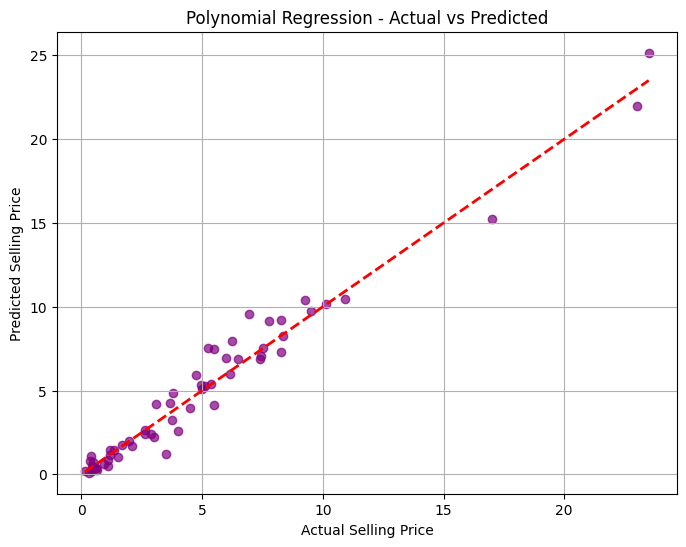

In [13]:
import matplotlib.pyplot as plt

# Scatter plot: Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_poly, alpha=0.7, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Polynomial Regression - Actual vs Predicted")
plt.grid(True)
plt.show()


The purple points are very close to the red line, meaning your polynomial regression model is predicting accurately across the range of actual car prices.

# **Step 8: Save the Polynomial Regression Model**

In [14]:
import joblib

# Save the trained pipeline
joblib.dump(polyreg_pipeline, "PolyReg_CarResalePrice.pkl")

print("Polynomial regression model saved as 'PolyReg_CarResalePrice.pkl'")


Polynomial regression model saved as 'PolyReg_CarResalePrice.pkl'


In [16]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

# Simulate a small DataFrame with example data
X_poly_sim = pd.DataFrame({
    'Present_Price': [5],
    'Car_Age': [3]
})

# Create polynomial transformer
poly = PolynomialFeatures(degree=2, include_bias=False)

# Fit the transformer
poly.fit(X_poly_sim)

# Get feature names after fitting
feature_names = poly.get_feature_names_out(['Present_Price', 'Car_Age'])

# Print them
print("Polynomial features generated:")
for i, name in enumerate(feature_names):
    print(f"{i+1}: {name}")


Polynomial features generated:
1: Present_Price
2: Car_Age
3: Present_Price^2
4: Present_Price Car_Age
5: Car_Age^2



## ✅ Why We Say Polynomial Degree = 2

We explicitly set the polynomial degree to 2 in the following part of the pipeline:

```python
from sklearn.preprocessing import PolynomialFeatures

PolynomialFeatures(degree=2, include_bias=False)
```

This transformation adds:

* **x** → the original feature
* **x²** → the square of the feature
* **x1·x2** → interaction terms between features

So for `Present_Price` and `Car_Age`, the model was trained on:

* `Present_Price`
* `Car_Age`
* `Present_Price²`
* `Car_Age²`
* `Present_Price × Car_Age`

That’s a **2nd-degree polynomial** transformation.

---

### 🧠 What Degree 2 Actually Means:

If input is `[x1, x2]` → output becomes:

```
[x1, x2, x1², x1·x2, x2²]
```

So "Polynomial Degree: 2" means:

* You capture all features **up to quadratic (2nd power)** including interaction terms.

---

